In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.io import fits
from scipy.signal import find_peaks
from calibrator import Calibrator

/usr/local/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
def load_calibration_lines(input_file='calibration_lines.csv',
                           elements=["Hg", "Ar", "Xe", "CuNeAr", "Kr"],
                           min_wavelength=100,
                           max_wavelength=1000):
    cal_lines = np.loadtxt(input_file, delimiter=',', dtype='U', skiprows=1)
    wave = cal_lines[:, 0].astype('float')
    element = cal_lines[:, 1]
    # Get lines of the requested elements
    lines = wave[np.isin(element, elements)]
    # Get only lines within the requested wavelength
    mask = (lines > min_wavelength) * (lines < max_wavelength)
    return lines[mask]

In [3]:
atlas = load_calibration_lines(
    "calibration_lines.csv", elements=["Xe"], min_wavelength=300, max_wavelength=900)

spectrum = np.median(fits.open('v_a_20190516_55_1_0_1.fits')[0].data[110:120], axis=0)

peaks, _ = find_peaks(spectrum, distance=10., threshold=10.)

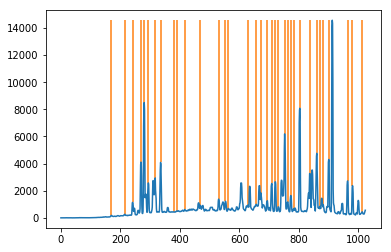

In [4]:
plt.plot(spectrum)
plt.vlines(peaks,
              spectrum[peaks.astype('int')],
              spectrum.max(),
              colors='C1')


[-1.06788307e-12  2.95240361e-09 -3.00981561e-06  1.39582005e-03
  1.46892957e-01  3.66486909e+02]
[ 7.65955954e-13 -2.60301142e-09  3.29170921e-06 -1.90329754e-03
  7.36227361e-01  3.35122136e+02]
[ 3.08702904e-12 -7.91955750e-09  7.40692017e-06 -3.02908981e-03
  7.25456563e-01  3.67264624e+02]
[ 1.22487672e-12 -3.41241482e-09  3.45709380e-06 -1.54411522e-03
  5.00908277e-01  3.88412556e+02]


No handles with labels found to put in legend.


[ 5.01861289e-12 -1.14221652e-08  9.20056389e-06 -2.98958738e-03
  7.42765471e-01  3.38658811e+02]
Peak at: 419.3249400488183 nm
- matched to 419.35 nm
Peak at: 438.4959638265545 nm
- matched to 438.39 nm
Peak at: 449.9202465951331 nm
- matched to 450.098 nm
Peak at: 462.37265418680073 nm
- matched to 462.428 nm
Peak at: 467.28701677088236 nm
- matched to 467.123 nm
Peak at: 473.54886285383793 nm
- matched to 473.415 nm
Peak at: 483.83393208343045 nm
Peak at: 491.86516087130656 nm
- matched to 491.99 nm
Peak at: 511.3676768765707 nm
Peak at: 516.2073663683577 nm
- matched to 516.271 nm
Peak at: 527.5843418300226 nm
Peak at: 550.0916553655791 nm
Peak at: 576.6341680229901 nm
Peak at: 586.455503146439 nm
Peak at: 590.7291250285607 nm
Peak at: 618.6783659925077 nm
- matched to 618.24 nm
Peak at: 631.3079072425646 nm
- matched to 631.806 nm
Peak at: 637.8926683040199 nm
Peak at: 647.6214748879884 nm
Peak at: 654.3053964798044 nm
Peak at: 659.6825230573481 nm
- matched to 659.556 nm
Peak at

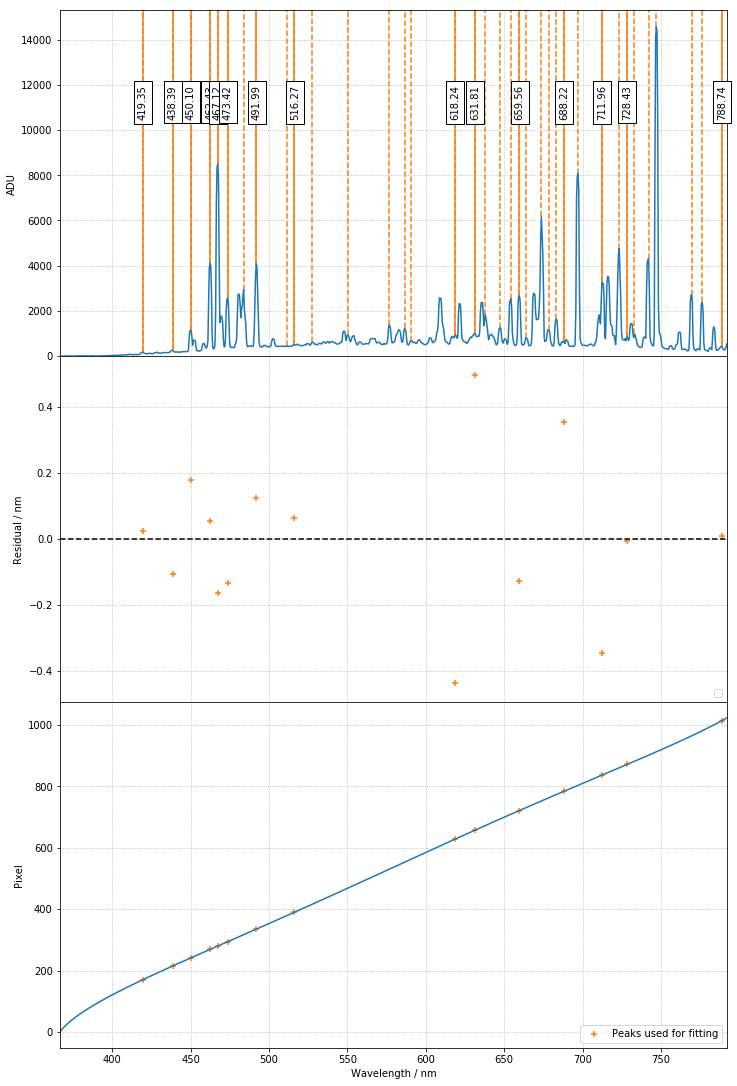

In [5]:
c = Calibrator(peaks, atlas)
c.set_fit_constraints(
    min_slope=0.2,
    max_slope=0.8,
    min_intercept=200.,
    max_intercept=500.,
    fit_tolerance=0.5,
    line_fit_thresh=2,
    thresh=5,
    polydeg=5,
    fittype='poly')

# Providing known pixel-wavelength mapping
#c.set_known_pairs([635.6024, 803.5022], [631.806, 711.96])
best_p = c.fit(mode='fast', progress=False)
c.plot_fit(spectrum, best_p)

/Users/marcolam/git/rascal/calibrator.py:170: RankWarning: Polyfit may be poorly conditioned
  polydeg)


[ 7.58251102e-13 -1.27290700e-09  5.49509609e-07  4.79092729e-05
  3.78449937e-01  3.51896145e+02]
[ 9.94719141e-13 -2.82014212e-09  2.99360302e-06 -1.46787171e-03
  5.71779751e-01  3.52182076e+02]
[ 9.94719141e-13 -2.82014212e-09  2.99360302e-06 -1.46787171e-03
  5.71779751e-01  3.52182076e+02]
[-2.71909995e-13 -3.81015877e-10  1.59491201e-06 -1.30129896e-03
  5.84297181e-01  3.69306257e+02]
[-9.93202215e-14  1.81534422e-10 -1.47910783e-07  1.15485459e-04
  4.05303466e-01  3.36181202e+02]
[ 7.48382812e-13 -2.38518366e-09  2.80570758e-06 -1.48675933e-03
  6.10446496e-01  3.22328632e+02]
[-3.00117904e-13  7.25000695e-10 -5.71505190e-07  1.57619802e-04
  4.54941777e-01  3.39628408e+02]
[ 5.78020997e-13 -1.64274175e-09  1.83295429e-06 -1.00860918e-03
  4.75842281e-01  3.79147485e+02]
[-1.58403846e-13 -1.30184642e-11  6.33766649e-07 -6.86344354e-04
  6.23505738e-01  3.18725847e+02]


No handles with labels found to put in legend.


[ 3.38141786e-13 -1.25759739e-09  1.74498162e-06 -1.08380012e-03
  5.09448543e-01  3.75664556e+02]
Peak at: 419.2788330349441 nm
- matched to 419.35 nm
Peak at: 440.4583038996236 nm
Peak at: 452.62616269858944 nm
- matched to 452.468 nm
Peak at: 465.6623279890471 nm
Peak at: 470.7635626928709 nm
Peak at: 477.23951583949287 nm
Peak at: 487.83908703932553 nm
Peak at: 496.1015796154919 nm
Peak at: 516.1911844329179 nm
- matched to 516.271 nm
Peak at: 521.1932303674521 nm
Peak at: 532.991409678496 nm
Peak at: 556.5240828405422 nm
- matched to 556.662 nm
Peak at: 584.5942207890716 nm
Peak at: 595.0446848481981 nm
Peak at: 599.5984958437962 nm
Peak at: 629.3987592569104 nm
Peak at: 642.8309676013696 nm
Peak at: 649.8163123042943 nm
Peak at: 660.1096339934036 nm
Peak at: 667.1608950712871 nm
- matched to 666.892 nm
Peak at: 672.8210453359679 nm
- matched to 672.801 nm
Peak at: 677.5505848952414 nm
Peak at: 687.5189007359552 nm
Peak at: 692.7589560320428 nm
- matched to 692.553 nm
Peak at: 697

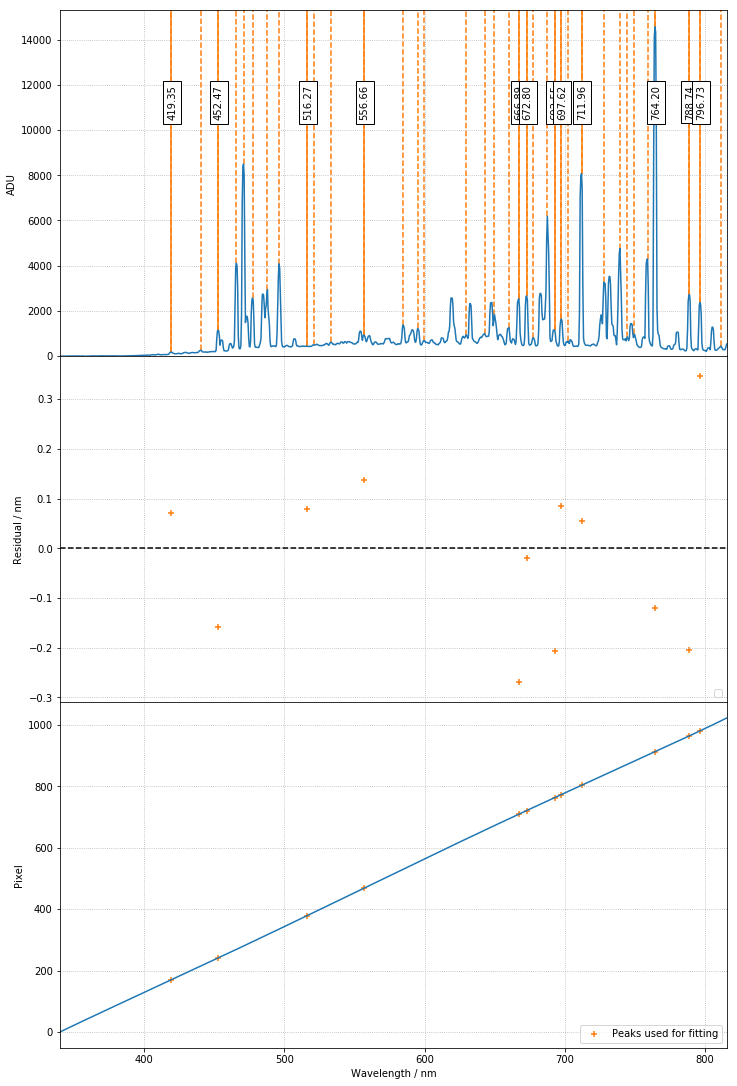

In [6]:
best_p = c.fit(progress=False)
c.plot_fit(spectrum, best_p)

[-1.08845728e-12  2.95060569e-09 -2.93084316e-06  1.31679962e-03
  1.71800468e-01  3.64067653e+02]
[-1.07690109e-12  2.33436343e-09 -1.58613970e-06  2.90415902e-04
  2.90919634e-01  3.67339285e+02]
[ 9.16053291e-13 -3.32004232e-09  4.24764409e-06 -2.41943887e-03
  8.53536114e-01  3.25980100e+02]
[ 1.10618905e-12 -2.94514141e-09  2.77466797e-06 -1.10167090e-03
  3.87615849e-01  3.93094722e+02]
[ 9.99061537e-13 -2.91475259e-09  3.15136807e-06 -1.52221471e-03
  7.68611761e-01  3.08070976e+02]
[ 1.49442042e-12 -4.07413735e-09  4.08208957e-06 -1.85490425e-03
  6.43472142e-01  3.22550933e+02]
[-1.37292376e-15  3.96954698e-11 -1.33457540e-07  1.75936998e-04
  3.74007836e-01  3.51305453e+02]
[-3.54809062e-12  8.27663369e-09 -6.49372167e-06  1.71749998e-03
  2.82148579e-01  3.46376824e+02]
[ 4.49358354e-14 -6.04041725e-10  1.27066274e-06 -9.96492688e-04
  6.89554694e-01  3.13813861e+02]


No handles with labels found to put in legend.


[ 2.09293098e-12 -5.32261309e-09  4.93257506e-06 -2.01470484e-03
  5.65863771e-01  3.80350099e+02]
Peak at: 419.3486461017481 nm
- matched to 419.35 nm
Peak at: 438.60766250825026 nm
- matched to 438.39 nm
Peak at: 449.92465568374143 nm
- matched to 450.098 nm
Peak at: 462.252688189229 nm
- matched to 462.428 nm
Peak at: 467.133075061888 nm
- matched to 467.123 nm
Peak at: 473.3731555222475 nm
- matched to 473.415 nm
Peak at: 483.6908294281925 nm
Peak at: 491.8193710005006 nm
- matched to 491.99 nm
Peak at: 511.8690585540847 nm
Peak at: 516.9179023334062 nm
Peak at: 528.9035945478191 nm
Peak at: 553.0691443338403 nm
Peak at: 582.1562986467798 nm
- matched to 582.389 nm
Peak at: 593.0068656102601 nm
- matched to 593.417 nm
Peak at: 597.7329867067671 nm
Peak at: 628.5553394665426 nm
Peak at: 642.3519841069831 nm
Peak at: 649.4963100480795 nm
Peak at: 659.9828418874098 nm
- matched to 659.556 nm
Peak at: 667.1374254496637 nm
- matched to 666.892 nm
Peak at: 672.8633585440774 nm
- matched 

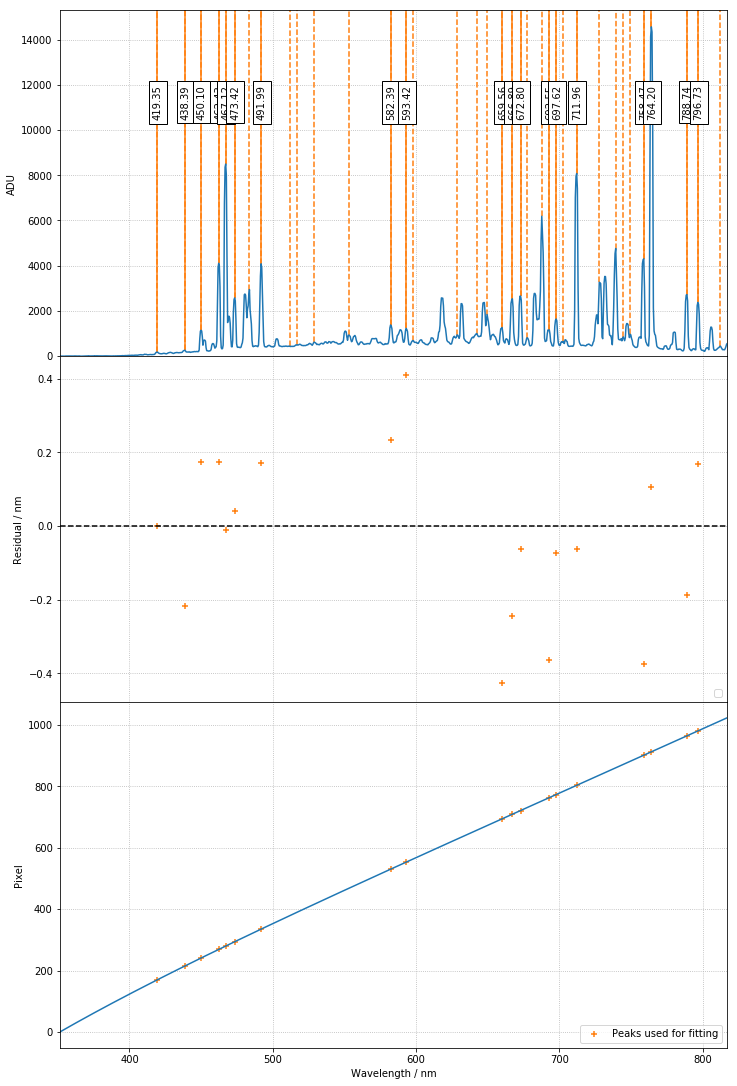

In [7]:
best_p = c.fit(mode='slow', progress=False)
c.plot_fit(spectrum, best_p)